In [196]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter


In [31]:
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s

In [32]:
def GetCountByVal(data, column, bought):
    if bought == 1:
        new_data = data[[column]][(data[column] == 1) & (data.spend_usd_next_14_days > 0.001)]
    else:
        new_data = data[[column]][(data[column] == 1) & (data.spend_usd_next_14_days <= 0.001)]
    return (new_data.count())

In [219]:
def PlotList(data):
    plt_index = ['credit_card', 'direct_carrier_billing', 'gift_card', 'paypal', 'fop']
    plt.bar((1, 2, 3, 4, 5), data, align='center')
    plt.xticks((1, 2, 3, 4, 5), plt_index, rotation=45)
    plt.show()
def NewPlotList(data, title_name):
    plt_index = ['credit_card', 'direct_carrier_billing', 'gift_card', 'paypal']
    fig, ax = plt.subplots()
    ax.bar((1,1.5,2,2.5), data, align='center', width=0.3)
    ax.grid(True, which='both', axis='y', alpha=0.4)
    plt.xticks((1,1.5,2,2.5), plt_index, rotation=45)
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
    ax.set_title(title_name)

In [34]:
my_data = pd.read_csv("C:\Users\wangz_i6ij2py\Downloads\Python_project_eda.csv")

In [35]:
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [36]:
#clean up data
my_data['spend_usd_next_14_days'] = winsorize_series(my_data['spend_usd_next_14_days'])
clean_data = my_data.fillna(0)
clean_data.describe()

C:\Users\wangz_i6ij2py\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\wangz_i6ij2py\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,5.666990e+05,566699.000000
mean,0.621745,0.225458,0.268135,0.184654,0.816589,7.824868,0.165135,0.144371,0.301036,0.055666,0.030085,9.222149e+18,0.874609
std,1.701956,0.417884,0.442989,0.388017,0.387004,35.159074,0.371303,0.351466,0.458709,0.229276,0.170821,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,289.344500,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [140]:
pot_buyer = clean_data[['made_purchase_before', 'saw_cart_before', 'user_added_credit_card', 'user_added_dcb', 'user_added_fop',\
                        'user_added_gift_card', 'user_added_paypal' ,'spend_usd_next_14_days']]\
                        [(clean_data.made_purchase_before == 0) & (clean_data.saw_cart_before == 1.0)]
pot_buyer.describe()

,made_purchase_before,saw_cart_before,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,spend_usd_next_14_days
count,358117.0,358117.0,358117.000000,358117.000000,358117.000000,358117.000000,358117.000000,358117.000000
mean,0.0,1.0,0.069620,0.072602,0.148898,0.013945,0.010865,0.287007
std,0.0,0.0,0.254505,0.259482,0.355989,0.117264,0.103668,4.607087
min,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,289.344500


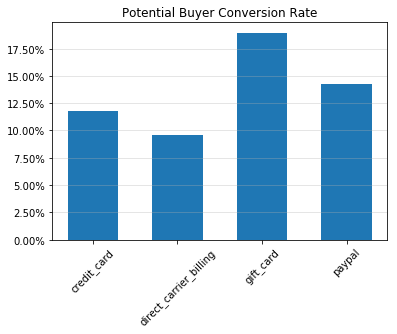

In [218]:
total = pot_buyer.shape[0]
cc_rate = GetCountByVal(pot_buyer, 'user_added_credit_card', 1) / float(total) / pot_buyer['user_added_credit_card'].mean()
dc_rate = GetCountByVal(pot_buyer, 'user_added_dcb', 1) / float(total) / pot_buyer['user_added_dcb'].mean()
gc_rate = GetCountByVal(pot_buyer, 'user_added_gift_card', 1) / float(total) / pot_buyer['user_added_gift_card'].mean()
pp_rate = GetCountByVal(pot_buyer, 'user_added_paypal', 1) / float(total) / pot_buyer['user_added_paypal'].mean()
rate = [cc_rate, dc_rate, gc_rate, pp_rate]
plt_index = ['credit_card', 'direct_carrier_billing', 'gift_card', 'paypal']
fig, ax = plt.subplots()
ax.bar((1,1.5,2,2.5), rate, align='center', width=0.3)
ax.grid(True, which='both', axis='y', alpha=0.4)
plt.xticks((1,1.5,2,2.5), plt_index, rotation=45)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.set_title("Potential Buyer Conversion Rate")

In [159]:
ret_buyer = clean_data[['existing_buyer', 'user_added_credit_card', 'user_added_dcb', 'user_added_fop', \
                        'user_added_gift_card', 'user_added_paypal' ,'spend_usd_next_14_days']]\
                            [(clean_data.existing_buyer == 1)]
ret_buyer.describe()

,existing_buyer,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,spend_usd_next_14_days
count,151952.0,151952.000000,151952.000000,151952.000000,151952.000000,151952.000000,151952.000000
mean,1.0,0.572747,0.431735,0.965219,0.203301,0.105560,28.700430
std,0.0,0.494681,0.495320,0.183225,0.402456,0.307274,63.011671
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.958759
75%,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,21.412268
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,289.344500


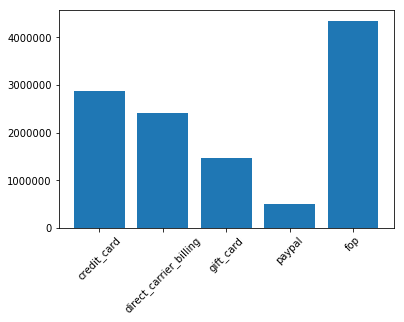

In [160]:
def GetRetBuyer(index):
    return(ret_buyer[['spend_usd_next_14_days']][(ret_buyer[index] == 1)&(ret_buyer.spend_usd_next_14_days>=0.001)])
cc_ret = GetRetBuyer('user_added_credit_card')
dc_ret = GetRetBuyer('user_added_dcb')
gc_ret = GetRetBuyer('user_added_gift_card')
pp_ret = GetRetBuyer('user_added_paypal')
fop_ret = GetRetBuyer('user_added_fop')
ret_sum = [cc_ret.sum(), dc_ret.sum(), gc_ret.sum(), pp_ret.sum(), fop_ret.sum()]
PlotList(ret_sum)

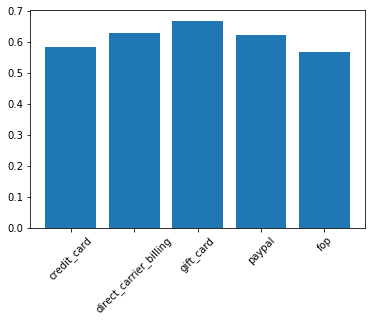

In [161]:
def GetRate(val, index):
    return(val.count()/float(ret_buyer.shape[0])/ret_buyer[index].mean())
ret_rate = [GetRate(cc_ret, 'user_added_credit_card'), GetRate(dc_ret, 'user_added_dcb'), GetRate(gc_ret, 'user_added_gift_card'), GetRate(pp_ret, 'user_added_paypal'), GetRate(fop_ret, 'user_added_fop')]
PlotList(ret_rate)

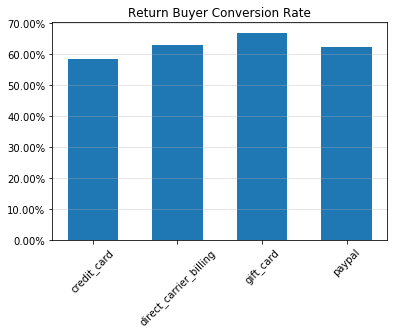

In [221]:
new_ret_rate = [GetRate(cc_ret, 'user_added_credit_card'), GetRate(dc_ret, 'user_added_dcb'), \
                GetRate(gc_ret, 'user_added_gift_card'), GetRate(pp_ret, 'user_added_paypal')]
NewPlotList(new_ret_rate, "Return Buyer Conversion Rate")

In [224]:
succ_buyer = clean_data[['made_purchase_before','user_added_credit_card', 'user_added_dcb', 'user_added_fop', \
                         'user_added_gift_card', 'user_added_paypal']][(clean_data.made_purchase_before==1)\
                                                                       &(clean_data.saw_cart_before == 1)]
succ_buyer.describe()

,made_purchase_before,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
count,104643.0,104643.000000,104643.000000,104643.000000,104643.000000,104643.000000
mean,1.0,0.587837,0.479019,0.990396,0.241708,0.112382
std,0.0,0.492227,0.499562,0.097529,0.428120,0.315837
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


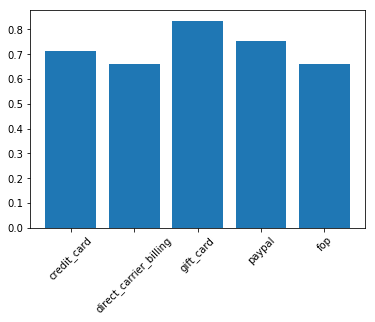

In [184]:
def GetSuccRate(index):
    return (succ_buyer[['made_purchase_before']]\
            [(succ_buyer['made_purchase_before'] == 1)&(succ_buyer[index] == 1)].shape[0]/float(succ_buyer.shape[0])/succ_buyer[index].mean())
succ_rate = [GetSuccRate('user_added_credit_card'), GetSuccRate('user_added_dcb'), GetSuccRate('user_added_gift_card'), \
             GetSuccRate('user_added_paypal'), GetSuccRate('user_added_fop')]
PlotList(succ_rate)

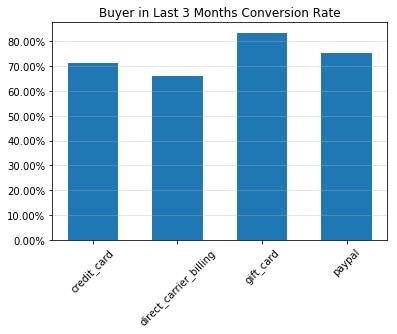

In [222]:
new_succ_rate = [GetSuccRate('user_added_credit_card'), GetSuccRate('user_added_dcb'), \
                 GetSuccRate('user_added_gift_card'), GetSuccRate('user_added_paypal')]
NewPlotList(new_succ_rate, "Buyer in Last 3 Months Conversion Rate")

In [147]:
raw_data =  pd.read_csv("C:\Users\wangz_i6ij2py\Downloads\Python_project_eda.csv")
spent_usd = raw_data[['spend_usd_next_14_days']][raw_data.spend_usd_next_14_days >= 0.001]

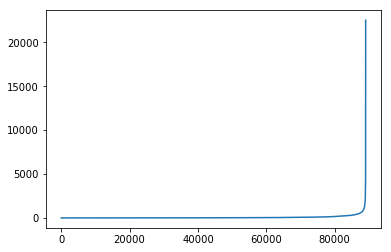

In [148]:
spent_list = spent_usd['spend_usd_next_14_days'].tolist()
spent_list.sort()
plt.plot(spent_list)

In [106]:
len(spent_list)

89032

In [165]:
new_buyer = clean_data[['spend_usd_next_14_days', 'saw_cart_before', 'made_purchase_before','user_added_credit_card', \
                      'user_added_dcb', 'user_added_fop', 'user_added_gift_card', 'user_added_paypal']]\
                        [(clean_data.spend_usd_next_14_days >= 0.001)]

In [167]:
#new_buyer.fillna(0)
new_buyer.describe()

,spend_usd_next_14_days,saw_cart_before,made_purchase_before,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
count,89032.000000,89032.000000,89032.000000,89032.000000,89032.000000,89032.000000,89032.000000,89032.000000
mean,49.806191,0.949962,0.857411,0.574063,0.472089,0.952321,0.233309,0.113128
std,76.009381,0.218025,0.349655,0.494487,0.499223,0.213088,0.422940,0.316751
min,1.026880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.990000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,15.828656,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,54.795602,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,289.344500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
saw_cart_buyer = clean_data[['spend_usd_next_14_days', 'existing_buyer']]\
                            [(clean_data.saw_cart_before == 1)&(clean_data.user_added_fop == 0)\
                             &(clean_data.spend_usd_next_14_days>=0.001)]
saw_cart_buyer.describe()

,spend_usd_next_14_days,existing_buyer
count,89032.000000,89032.000000
mean,49.806191,0.940841
std,76.009381,0.235922
min,1.026880,0.000000
25%,4.990000,1.000000
50%,15.828656,1.000000
75%,54.795602,1.000000
max,289.344500,1.000000


In [164]:
new_from_exist = ret_buyer[ret_buyer.spend_usd_next_14_days>0.001]
new_from_exist.describe()

,existing_buyer,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,spend_usd_next_14_days
count,83765.0,83765.000000,83765.000000,83765.000000,83765.000000,83765.000000,83765.000000
mean,1.0,0.604357,0.491661,0.994317,0.246439,0.119119,52.063364
std,0.0,0.488991,0.499933,0.075169,0.430940,0.323930,77.370624
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.026880
25%,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,5.317186
50%,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,17.480000
75%,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,58.720000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,289.344500


In [233]:
non_exist = clean_data[['visit_before', 'saw_cart_before', 'user_added_fop', 'clicked_buy_before', 'made_purchase_before']]\
                        [clean_data.made_purchase_before == 0]
non_exist.describe()

,visit_before,saw_cart_before,user_added_fop,clicked_buy_before,made_purchase_before
count,462056.000000,462056.000000,462056.000000,462056.000000,462056.0
mean,0.846211,0.775051,0.144915,0.050046,0.0
std,0.360746,0.417549,0.352016,0.218040,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0


In [226]:
q2_ret = clean_data[['user_added_credit_card', 'user_added_dcb', 'user_added_gift_card', 'user_added_paypal', 'spend_usd_next_14_days']]\
                    [(clean_data.saw_cart_before == 1) & (clean_data.made_purchase_before)]
q2_ret.describe()

,user_added_credit_card,user_added_dcb,user_added_gift_card,user_added_paypal,spend_usd_next_14_days
count,104643.000000,104643.000000,104643.000000,104643.000000,104643.000000
mean,0.587837,0.479019,0.241708,0.112382,40.830265
std,0.492227,0.499562,0.428120,0.315837,72.379083
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,8.980000
75%,1.000000,1.000000,0.000000,0.000000,41.177891
max,1.000000,1.000000,1.000000,1.000000,289.344500


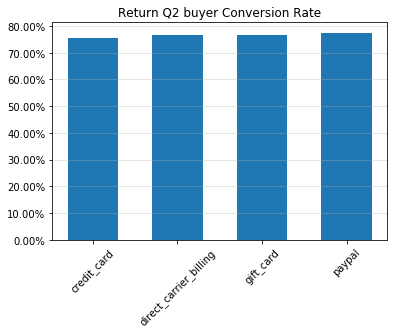

In [227]:
def GetQ2Rate(index):
    q2_ret_rate = q2_ret[(q2_ret.spend_usd_next_14_days > 0.001)&(q2_ret[index] == 1)].shape[0]/float(q2_ret.shape[0])
    return (q2_ret_rate/q2_ret[index].mean())
cc_q2 = GetQ2Rate('user_added_credit_card')
dc_q2 = GetQ2Rate('user_added_dcb')
gc_q2 = GetQ2Rate('user_added_gift_card')
pp_q2 = GetQ2Rate('user_added_paypal')
q2_rate = [cc_q2, dc_q2, gc_q2, pp_q2]
NewPlotList(q2_rate, 'Return Q2 buyer Conversion Rate')

In [228]:
q2_rate

[0.7546534878806106, 0.7644535769859953, 0.767247855137785, 0.7748299319727892]

In [232]:
clean_data['initial_fop_set'].mean()

0.31468380921794464

In [238]:
initial = clean_data[['user_added_fop', 'initial_fop_set']][clean_data.spend_usd_next_14_days > 0.001]
initial['initial_fop_set'] = initial.initial_fop_set.astype(int)
initial.describe()

,user_added_fop,initial_fop_set
count,89032.000000,89032.000000
mean,0.952321,0.968382
std,0.213088,0.174981
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000
